# Домашнее задание к лекции 4.2 «Визуализация данных» 
В файле должны быть сохранены результаты запуска на тестовых данных.

Дано: данные о популярности имен для новорожденных. Добавлять исходные данные в репозиторий с выполненным заданием необязательно, но в блокноте необходимо выделить путь к файлам в отдельную переменную, которую легко поменять.

1 - Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

2 - Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

3 - Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

4 - Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

In [11]:
# Путь до папки
PATH = '/Users/DrG/PycharmProjects/py-homework-advanced/2.6.Data_analysis2/names/'

In [3]:
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(PATH, year), 
                                      names=['Name', 'Gender', 'Count']
                                     )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [4]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

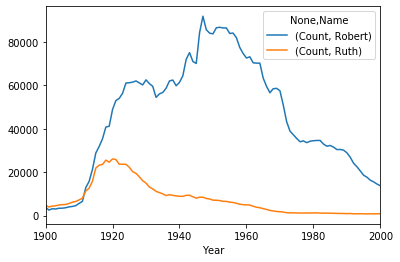

In [5]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

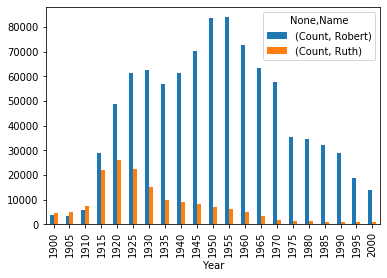

In [6]:
names_by_year = {}
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(PATH, year), 
                                      names=['Name', 'Gender', 'Count']
                                     )
names_all_hist = pd.concat(names_by_year, names=['Year', 'Pos'])
name_dynamics = names_all_hist.groupby([names_all_hist.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

3. Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

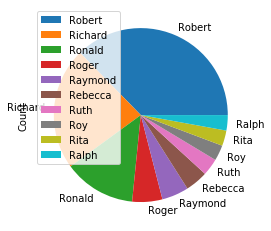

In [7]:
names_1950 = pd.read_csv('{}/yob{}.txt'.format(PATH, 1950), 
                                      names=['Name', 'Gender', 'Count'])
names_start_R = names_1950[(names_1950.Name.str.startswith("R"))]
names_for_pie = names_start_R.groupby('Name').sum().sort_values(by='Count', ascending=False).head(10)
names_for_pie.plot.pie(y="Count")

4. Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. 

Т.е. необходимо сложить всю статистику с 1900 до 2000, 
сгруппировать по именам, 
посчитать количество согласных букв в каждом имени и 
вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [8]:
names = names_all.groupby('Name').sum().reset_index()

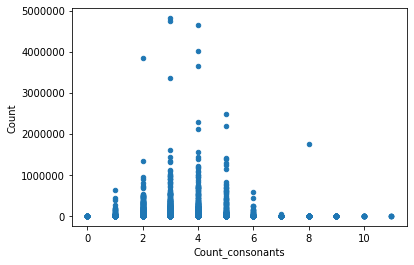

In [9]:
def count_consonants_letters(row):
    """Функция получает на вход строку и, возвращает кол-во согласных букв."""
    vowels = set("aeiouy")
    
    return sum(name.lower() not in vowels for name in row.Name)


names["Count_consonants"] = names.apply(count_consonants_letters, axis=1)
names.plot.scatter(x='Count_consonants', y='Count')